In [20]:
# 필요한 패키지 불러오기
import keras
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# 로이터 기사 데이터셋 불러오기
from keras.datasets import reuters
# 1만개의 단어를 갖고옴
(train_data, train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [22]:
train_data.shape

(8982,)

In [23]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [25]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [26]:
train_labels[0]

3

In [27]:
# 데이터 준비
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension)) # 0으로 가득찬 빈행렬

    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1 # 1로 마킹

    return results

# 데이터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [29]:
# label data의 encoding
def to_one_hot(labels,dimension=46): # 데이터의 topic 갯수가 46개
    results = np.zeros((len(labels),dimension))

    for i, sequence in enumerate(labels):
        results[i,sequence] = 1

    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [30]:
# Categorical 데이터로 변환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [56]:
# 신경망 구성
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [57]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', # 3개 이상일 때 사용
              metrics=['accuracy'])

In [58]:
# 훈련 데이터 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [59]:
# 훈련 및 모델 피팅
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) # 학습용 데이터와 학습용 라벨

Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 2.6554 - accuracy: 0.5475 - val_loss: 1.7379 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4146 - accuracy: 0.7073 - val_loss: 1.3060 - val_accuracy: 0.6980
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0502 - accuracy: 0.7752 - val_loss: 1.1466 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8318 - accuracy: 0.8270 - val_loss: 1.0422 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6641 - accuracy: 0.8641 - val_loss: 0.9691 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5377 - accuracy: 0.8891 - val_loss: 0.9322 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4359 - accuracy: 0.9093 - val_loss: 0.9091 - val_accuracy: 0.8030
Epoch 8/20
16

In [60]:
# 학습 결과 가져오기
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(loss)+1)

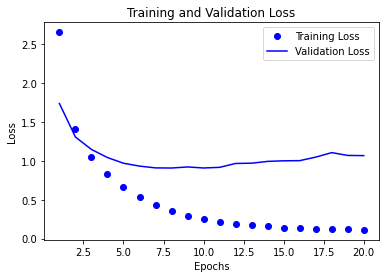

In [61]:
# 결과 시각화
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

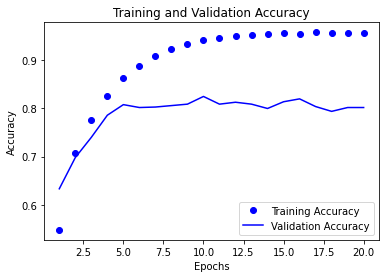

In [62]:
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()